reading the file : Actual and forecasted consumption of 13 Nov 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
path1 = r"Actual_consumption_202111130000_202111132359_1.csv"
path2 = r"Forecasted_consumption_202111130000_202111132359_2.csv"
df1 = pd.read_csv(path1,sep=";")
df2 = pd.read_csv(path2,sep=";")

Total (grid load) column is converted to integer type after removing the ","(comma)

In [2]:
df1['Total (grid load)[MWh]'] = df1['Total (grid load)[MWh]'].str.replace(',', '').astype('int')
df2['Total (grid load)[MWh]'] = df2['Total (grid load)[MWh]'].str.replace(',', '').astype('int')

Working with single file: Actual load comnsumption
Convert "Time of day" column to datetime type and extracted as a given format.[12:15 AM]

In [3]:
df1["Time of day"] = pd.to_datetime(df1["Time of day"]).dt.strftime('%I:%M %p')

ploting the daily load curve for actual load consumption

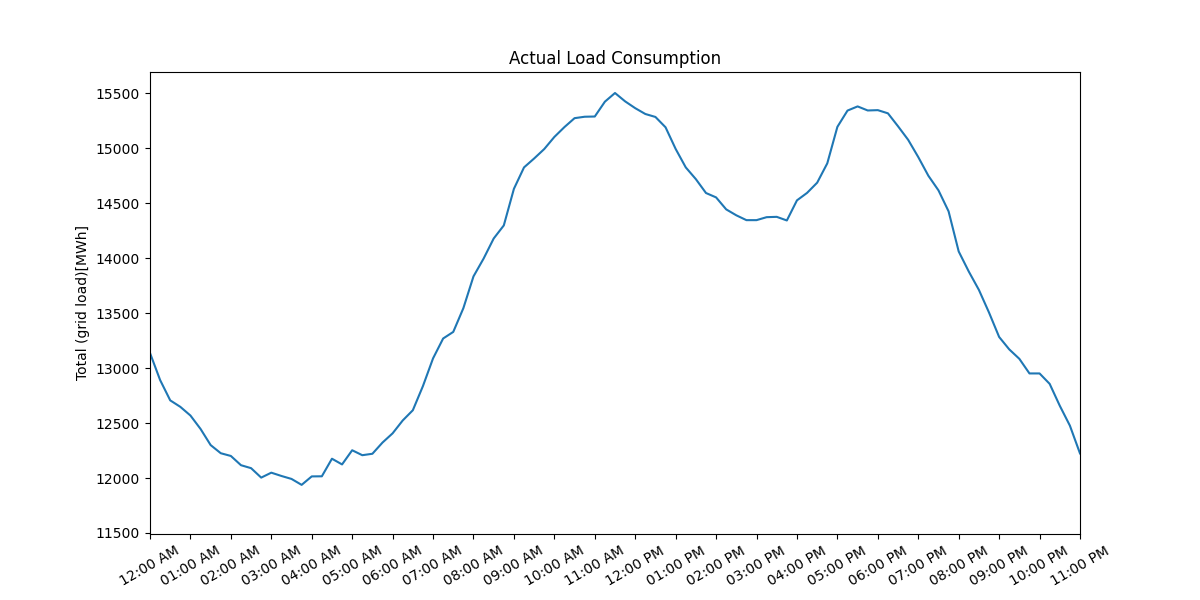

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df1["Time of day"],df1["Total (grid load)[MWh]"],label='Actual load')

#plt.ylim([8000,20000])
plt.xlim([12,50]) 
custom_ticks = range(0, len(df1["Time of day"]), 4)
ax.set_xticks(custom_ticks)
#plt.locator_params(axis='x', nbins=10)# didnot work
plt.xticks( rotation=30)
plt.title("Actual Load Consumption")
plt.ylabel("Total (grid load)[MWh]")
plt.show()

Working with Forecasted Load Data:
Firstly converted to the datetime and load curve is plotted

In [5]:
df2["Time of day"] = pd.to_datetime(df2["Time of day"]).dt.strftime('%I:%M %p')

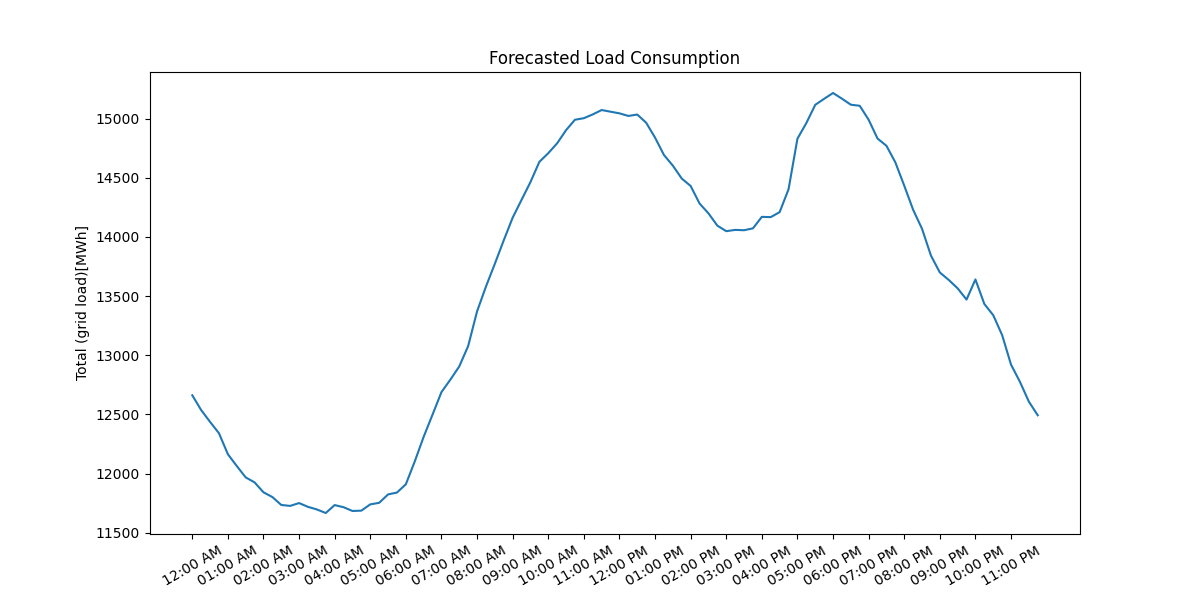

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df2["Time of day"],df2["Total (grid load)[MWh]"], label='frocasted load')

#plt.ylim([8000,20000])
#plt.xlim([12,50])
custom_ticks = range(0, len(df1["Time of day"]), 4)
ax.set_xticks(custom_ticks)
plt.title("Forecasted Load Consumption")
plt.ylabel("Total (grid load)[MWh]")
plt.xticks( rotation=30)
plt.show()

Sorted the dataframe by Total Grid Load and assigned to new variable

In [7]:
sorted_Load = df1.sort_values(by='Total (grid load)[MWh]', ascending=False)
type(sorted_Load)

pandas.core.frame.DataFrame

In [8]:
type(df1["Total (grid load)[MWh]"])

pandas.core.series.Series

Load Duration Curve plotting 

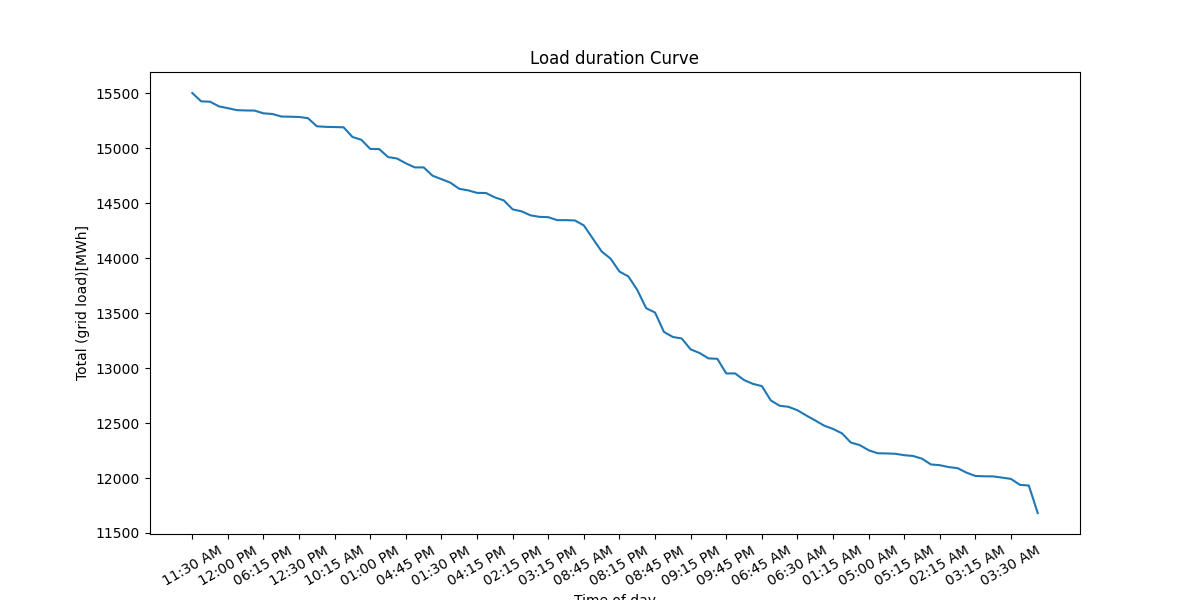

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(sorted_Load["Time of day"],sorted_Load["Total (grid load)[MWh]"])
#plt.xlim([12,50])
custom_ticks = range(0, len(sorted_Load), 4)
ax.set_xticks(custom_ticks)
#plt.locator_params(axis='x', nbins=10)
plt.xticks( rotation=30)
plt.title("Load duration Curve")
plt.xlabel("Time of day")
plt.ylabel("Total (grid load)[MWh]")
plt.show()

Capacity Factor Calculation:

In [11]:
summm = 0
for i in range(len(df1["Total (grid load)[MWh]"])):
         summm += df1["Total (grid load)[MWh]"][i]
                
max_load = df1["Total (grid load)[MWh]"].max()
minimum_load = df1["Total (grid load)[MWh]"].min()
mean_load = df1["Total (grid load)[MWh]"].mean()
capacity_factor  = summm/max_load
peak_to_minimum = max_load/minimum_load
peak_to_mean = max_load/mean_load

In [12]:
capacity_factor

85.015608875129

In [13]:
peak_to_minimum

1.3271700051361068

In [14]:
peak_to_mean

1.129204404581809